# Decision Tree Training

Imports and Libraries

In [1]:
#Global imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Functions Definition

In [2]:
def convertSex():
    df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})

def multiply_by_Scalar(conv_array, scalar):
    for i in conv_array:
        df[i] = df[i].apply(lambda x: x*scalar)

def treat_data():
    global df
    df.round()
    df=df.apply(np.int64)

def prune(tree):
    dat = tree.tree_
    nodes = range(0, dat.node_count)
    for i in nodes:
        dat.threshold[i]=int(dat.threshold[i])
    ls = dat.children_left
    rs = dat.children_right
    classes = [[list(e).index(max(e)) for e in v] for v in dat.value]

    leaves = [(ls[i] == rs[i]) for i in nodes]

    LEAF = -1
    for i in reversed(nodes):
        if leaves[i]:
            continue
        if leaves[ls[i]] and leaves[rs[i]] and classes[ls[i]] == classes[rs[i]]:
            ls[i] = rs[i] = LEAF
            leaves[i] = True
    return tree


Load Dataset

In [18]:
f = 'abalone.data'
sep = ','
df = read_csv(f, sep, header = None)
df.columns = ['Sex','Length','Diameter','Height','Whole Weight', 'Shucked Weight','Viscera Weight','Shell Weight','Rings']
df.sample(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole Weight      4177 non-null float64
Shucked Weight    4177 non-null float64
Viscera Weight    4177 non-null float64
Shell Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


ValueError: `dataset` input should have multiple elements.

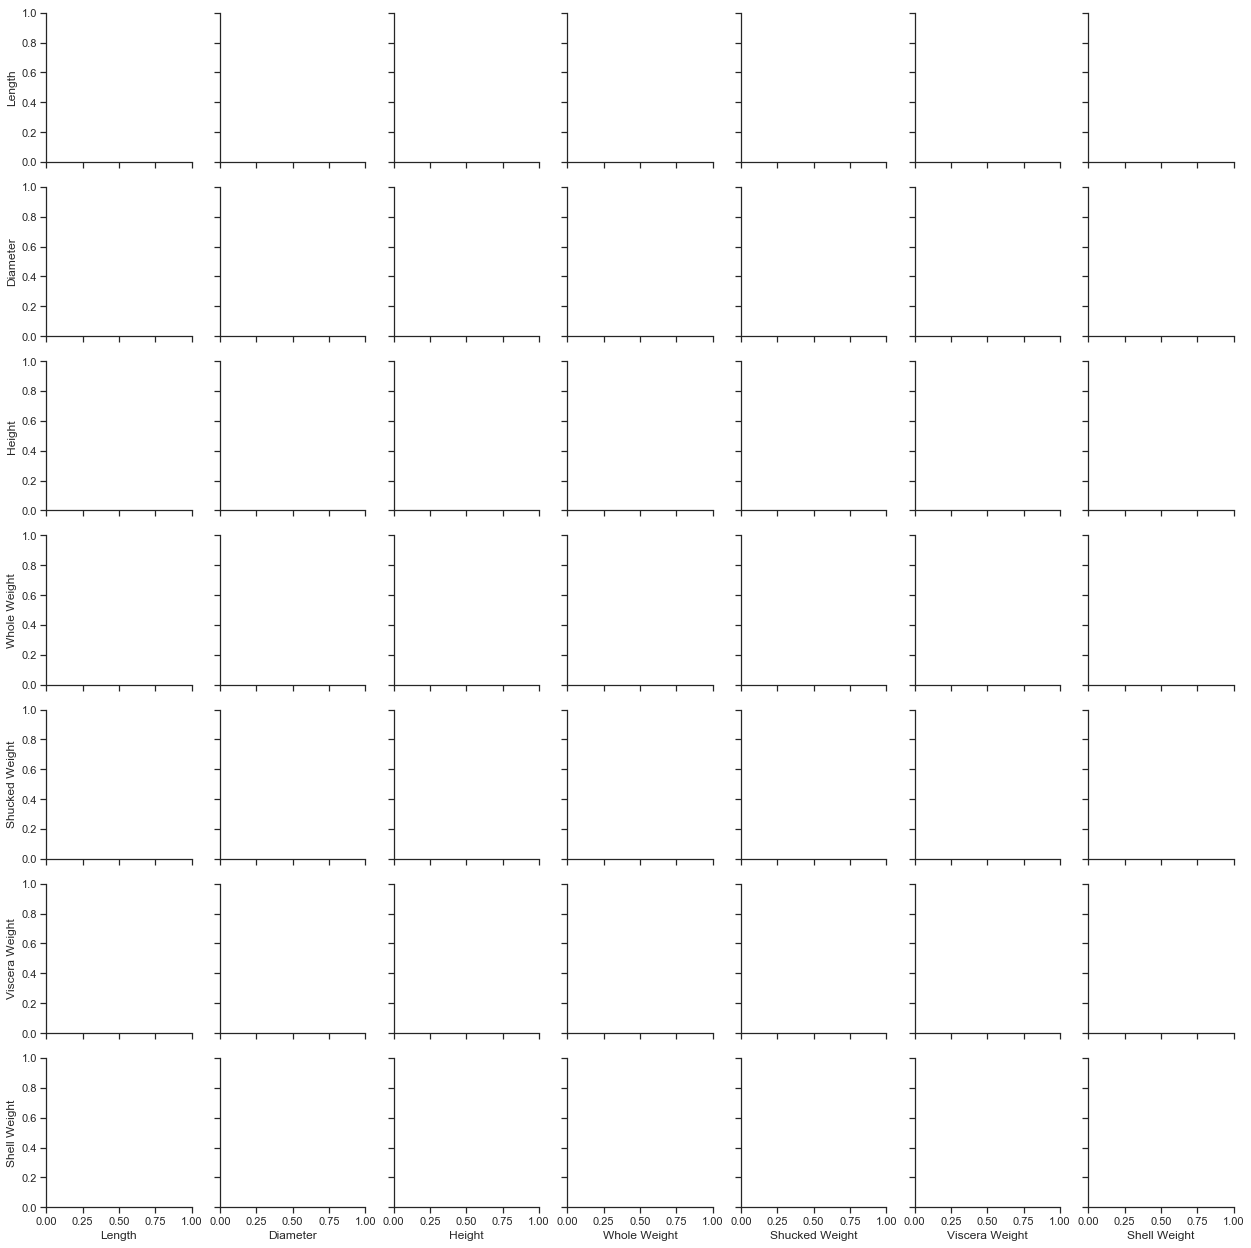

In [16]:
sns.pairplot(df, vars=df.columns[1:-1],hue='Rings')
plt.show()

In [ ]:
#Eliminate zeros and outliers
df = df[df.Height > 0]
df = df[df.Height < 0.4]
#df = df[df.Rings >= 3]
#df = df[df.Rings <= 22]
#df = df[df.Height > 0.019]